<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_12/02_pca_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


<center><H1>PCA With Diabetes Dataset</H1></center>

<p align="center">
  <img width="500" height="200" src="https://i.gifer.com/H7zW.gif">
</p>


👉🏼 [Data Dictionary](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 👈🏼

<center><H3>Steps (Must be performed in this order)</H></center>

1. [Split Data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data). 
    - **Plots Require**:
        - Title
        - Axis Labels
        - Legend
        - A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
3. Determine Baseline Model
4. [Scale Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. [Create Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
6. Compare Results to Baseline
7. [Perform PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
8. Use Your Principal Components for a Logistic Regression Model
9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

✨BONUS✨
 - Create a Scree Plot (You will probably have to research this)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
589,0,73,0,0,0,21.1,0.342,25,0
400,4,95,64,0,0,32.0,0.161,31,1
34,10,122,78,31,0,27.6,0.512,45,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Spliting the Features and Target Class

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
display(X, y)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# EDA

- Feature distribution using Histogram

Text(0.5, 1.0, 'Feature distribution')

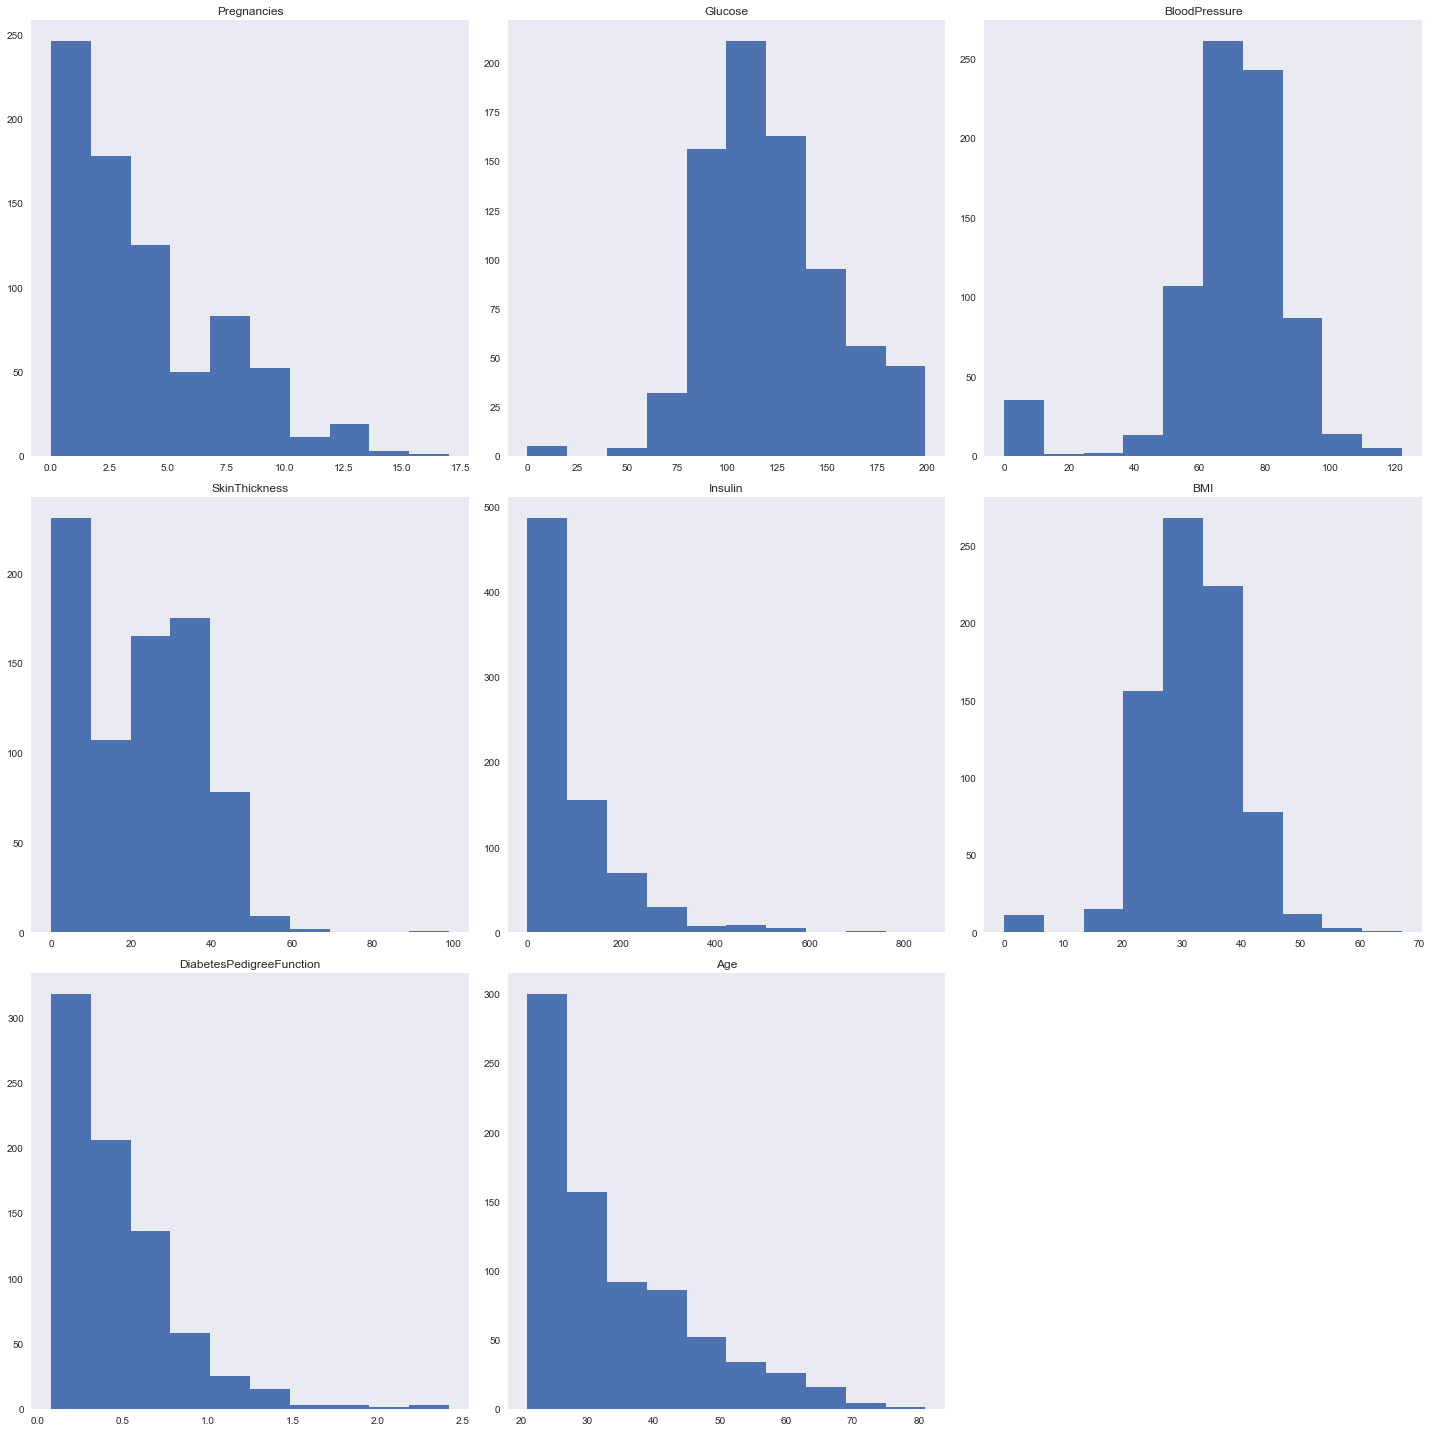

In [32]:
X.hist(figsize=(20,20), grid=False)
plt.tight_layout()
plt.title('Feature distribution')

- First, I wanted to understand the age distribution as we can see most of it start from 21 - 33 approx. 
- Second, is the insulin level it has to be higher than 0 for people who have no diabetes, so zero-level represents people how has diabetes. 
- Third is DiabetesPedigreeFunction basically is a function that determines the risk of type 2 diabetes based on family history the larger the function, the higher the risk of type 2 diabetes.

- Correlation Analysis

Text(0.5, 1.0, 'Feature Correlation')

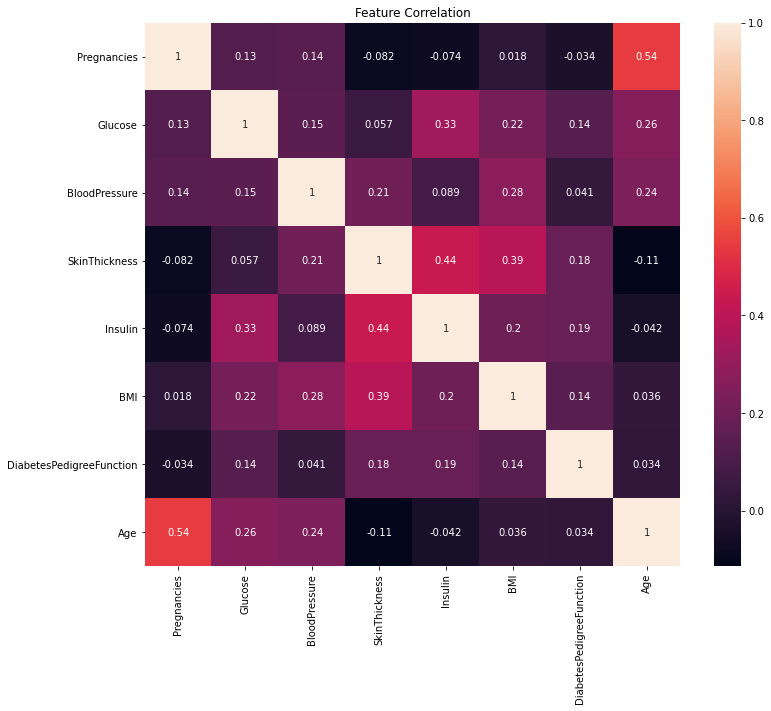

In [10]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(X.corr(),annot=True)
ax.set_title("Feature Correlation")

- the highest corr we can observe here is between 'Age' & 'Pregnancies' I believe it’s normal and clear that the older the woman gets the more she could get pregnant. 

# Baseline

In [12]:
# baseline model 
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

- majoirty class is 0 

# Scale Data

In [13]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)

In [14]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

In [15]:
pd.Series(pca.explained_variance_ratio_) 

0    0.261797
1    0.216401
2    0.128704
3    0.109441
4    0.095293
5    0.085329
6    0.052477
7    0.050558
dtype: float64

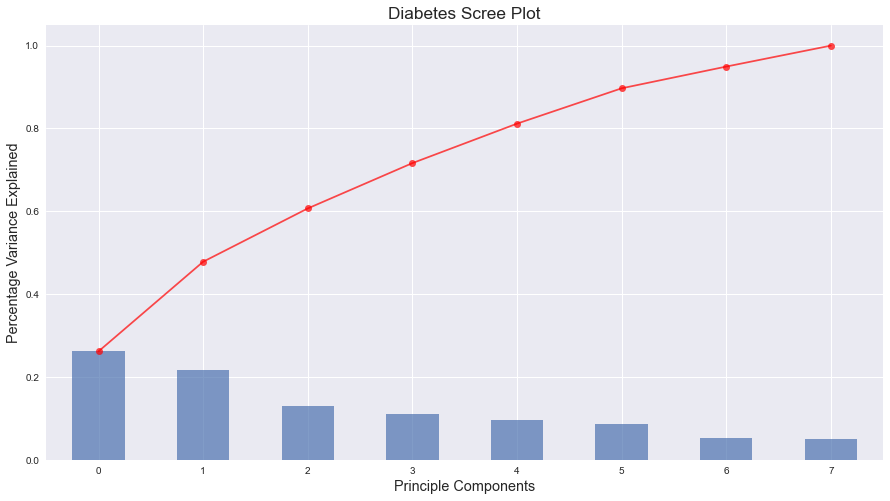

In [16]:
plt.style.use("seaborn")
plt.figure(figsize=(15,8))

exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7, color = 'red' ) #plot line chart of increasing variances

plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Diabetes Scree Plot", fontsize="xx-large")
plt.show();

# Train & Test split 

In [17]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

# Tranform data using Scalar

In [18]:
# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

#### Fit PCA & Apply the Results to a Logistic Regression Model 
- Apply PCA with 3 components 
-  Compare between the two models with NoPCA & withPCA when it comes to training time --> expected to be less with PCA bc of dim reduction of features. 

In [20]:
# fit PCA
pca = PCA(n_components = 3 )
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

# Created two model to compare training time
logreg_noPCA = LogisticRegression(max_iter=2085) 
logreg = LogisticRegression()

In [21]:
# Measure how long it takes to train without PCA

%timeit logreg_noPCA.fit(X_train, y_train)

35.4 ms ± 4.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
# Measure how long it takes to train with PCA

%timeit logreg.fit(X_train_pca, y_train)

2.23 ms ± 82.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Evaluate Model
- Comparing the model performance on both train & test data to see if there's an overfitting

In [23]:
print('Training accuracy:', logreg.score(X_train_pca, y_train))
print('Testing accuracy:', logreg.score(X_test_pca, y_test))

Training accuracy: 0.7291666666666666
Testing accuracy: 0.6875


# Creating Pipeline
- Here we're trying the 7th features using pipline 
- Evaluate Model

In [28]:
pipe = make_pipeline(
    # Step-1 Scale parameters
    StandardScaler(),
    # Step-2 create PCA and set number of components
    PCA(n_components= 7),
    # Step-3 fit the principles to the ML model
    LogisticRegression()
)

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.734375

In [25]:
pred = pipe.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       123
           1       0.64      0.61      0.62        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



- Including all 7 components had to lead us to better results, we noticed that in this dataset the correlations were weak so the best choice was to use them all. 

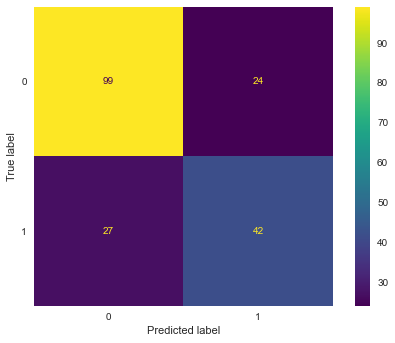

In [26]:
plot_confusion_matrix(pipe, X_test, y_test)
plt.grid(False);